Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.


C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente['product_score'] = (
C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_BANK_vista_cliente['balance'], palette='deep')  # Usando la paleta 'deep'


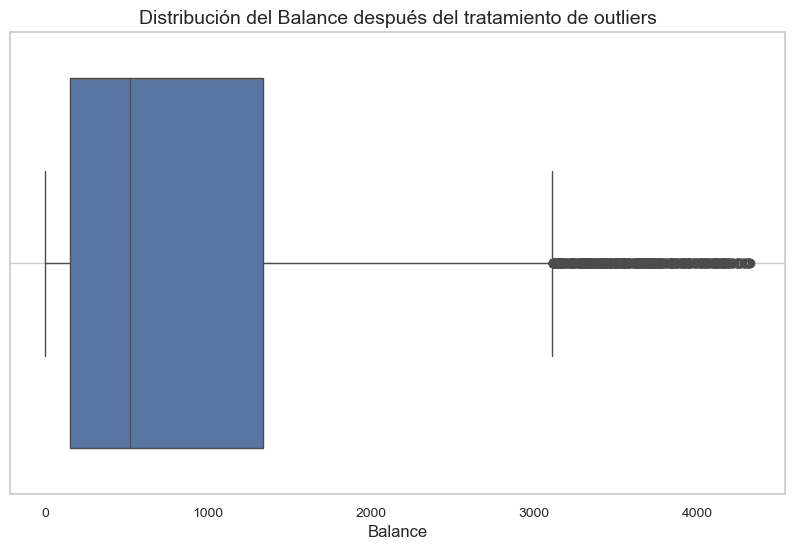

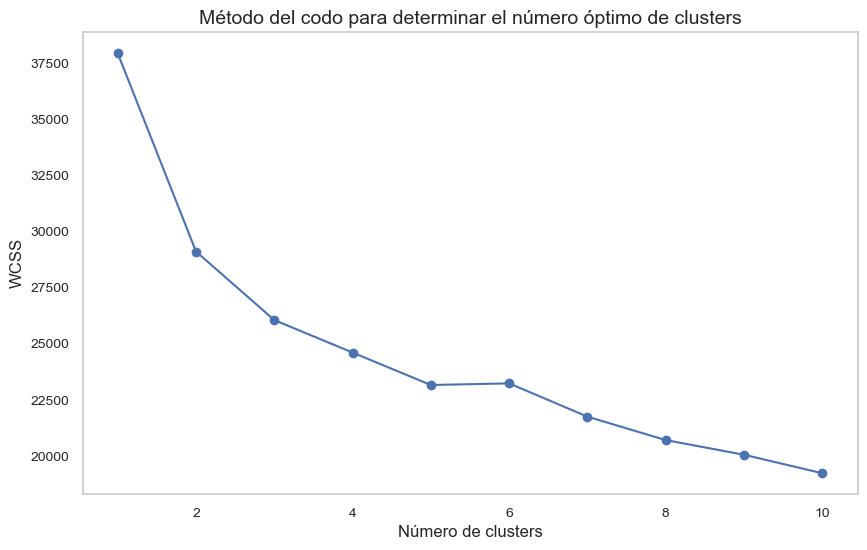

   cluster  avg_total_score  avg_balance  total_balance  \
0        0         4.162065  2034.994398        5085451   
1        1         3.232661   442.647319         899902   
2        2         1.752013   165.124161         492070   
3        3         3.516373  1121.413098        2226005   

  most_common_balance_category most_common_age_group most_common_job  \
0                         Alto                 31-40      management   
1                        Medio                 31-40     blue-collar   
2                         Bajo                 31-40      management   
3                        Medio                 31-40      management   

  most_common_marital most_common_education  client_count  
0             married             secondary          2499  
1             married             secondary          2033  
2             married             secondary          2980  
3              single             secondary          1985  


C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_BANK_vista_cliente, palette='deep')  # Usando la paleta 'deep'


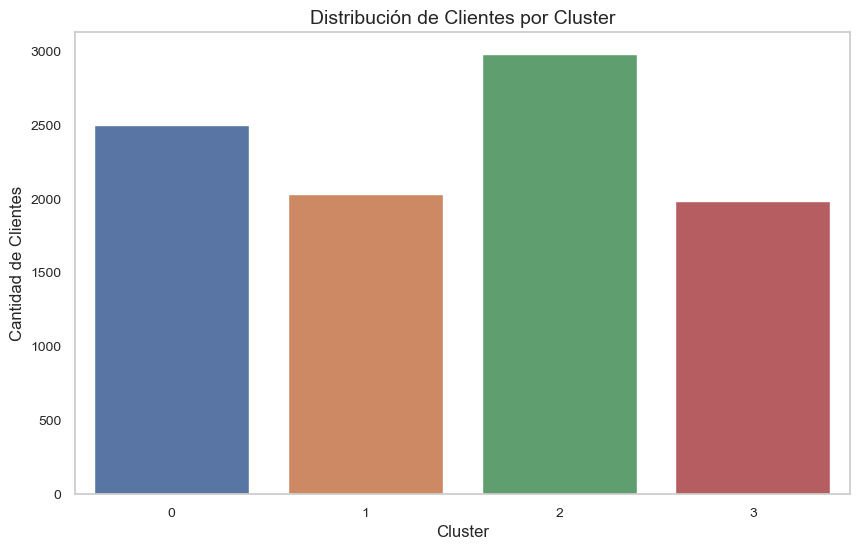

C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_total_score', y='cluster', data=clustered_data, palette='deep')  # Usando la paleta 'deep'


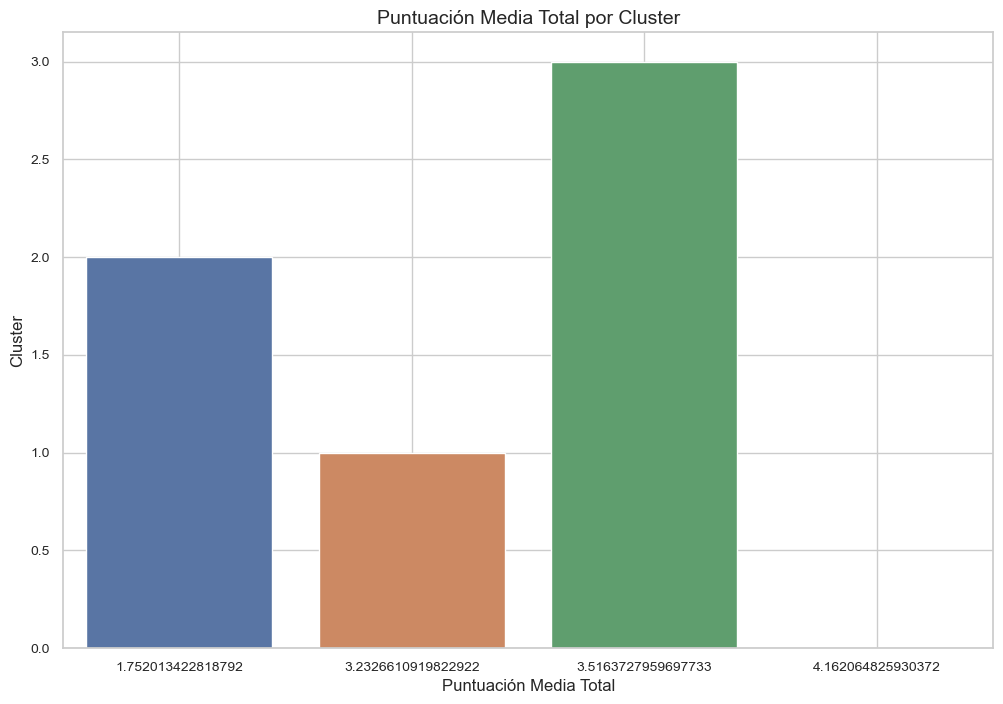

C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:224: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'


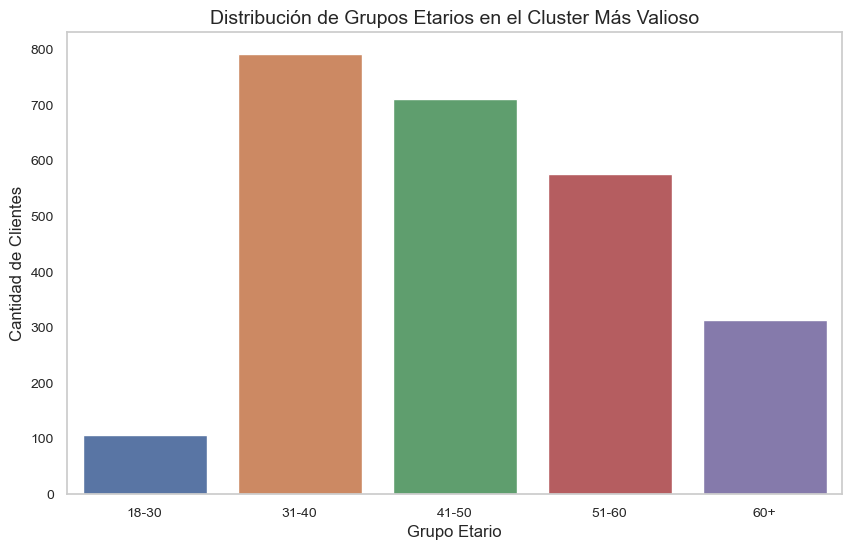

C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:233: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'


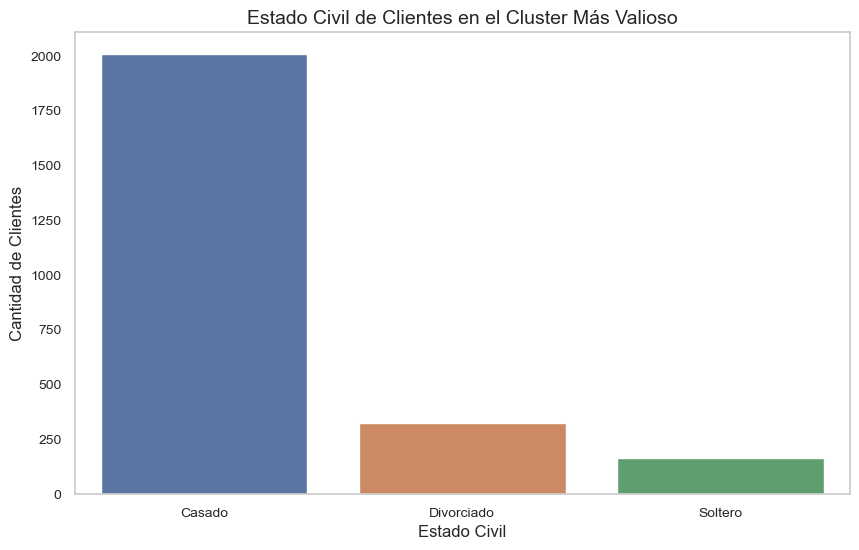

C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'


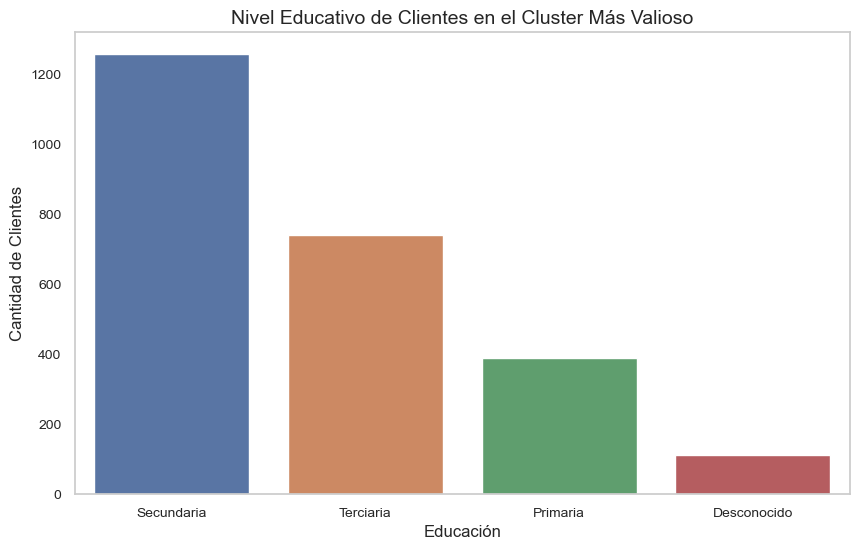

C:\Users\ereth\AppData\Local\Temp\ipykernel_9348\2784422335.py:251: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'


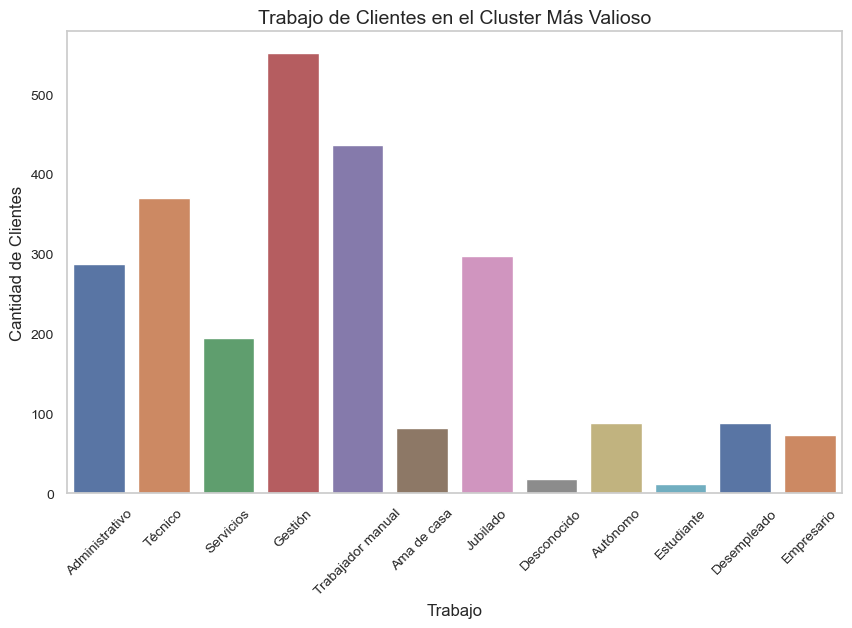

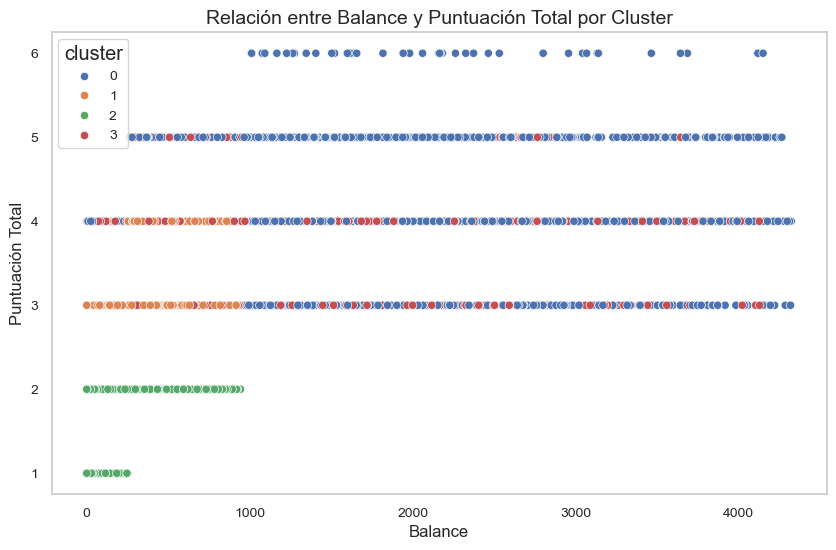

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, inspect
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Conexión a la base de datos
usuario = 'EquipoB'
contraseña = "E1q2u3i4p5oB"
host = '212.227.90.6'
puerto = 3306
nombre_base_datos = 'EquipB'

url_conexion = f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    engine = create_engine(url_conexion)
    cnx = engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")

# Cargar los datos
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

df = {}
for tabla in nombre_tablas:
    query = f"SELECT * FROM {tabla}"
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}': {e}")

# Cerrar conexión
cnx.close()

# Preparar el DataFrame de clientes
df_BANK_cliente = df['BANK_marketing']
df_BANK_vista_cliente = df_BANK_cliente[['id', 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'deposit']]

# Asignar pesos a los productos financieros
df_BANK_vista_cliente['product_score'] = (
    df_BANK_vista_cliente['housing'].astype(int)  +
    df_BANK_vista_cliente['loan'].astype(int)  +
    df_BANK_vista_cliente['deposit'].astype(int) 
)

# Configuración de estilo y contexto de Seaborn
plt.style.use("seaborn-v0_8-deep")  # Defino estilo para los gráficos
# Configuración de parámetros globales para Matplotlib
plt.rcParams.update({
 'font.size': 12,
 'axes.titlesize': 14,
 'axes.labelsize': 12,
 'legend.fontsize': 10,
 'xtick.labelsize': 10,
 'ytick.labelsize': 10,
 'xtick.major.size': 5,
 'ytick.major.size': 5,
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'figure.figsize': (8, 6),
 'figure.dpi': 100
})
# Configuración de estilo y contexto de Seaborn
sns.set(style="whitegrid") # Estilo del gráfico
sns.set_context("notebook", font_scale=1.2, rc={
 "axes.labelsize": 12,
 "axes.titlesize": 14,
 "xtick.labelsize": 10,
 "ytick.labelsize": 10,
 "legend.fontsize": 10
})

# Tratamiento de balances negativos: eliminarlos si no son relevantes para el análisis
df_BANK_vista_cliente = df_BANK_vista_cliente[df_BANK_vista_cliente['balance'] >= 0]

# Tratamiento de outliers con el método IQR
Q1 = df_BANK_vista_cliente['balance'].quantile(0.25)
Q3 = df_BANK_vista_cliente['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_BANK_vista_cliente = df_BANK_vista_cliente[~((df_BANK_vista_cliente['balance'] < lower_bound) | (df_BANK_vista_cliente['balance'] > upper_bound))]

# Visualizar la distribución del balance después del tratamiento de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_BANK_vista_cliente['balance'], palette='deep')  # Usando la paleta 'deep'
plt.title('Distribución del Balance después del tratamiento de outliers')
plt.xlabel('Balance')
plt.grid()
plt.show()

# Categorización del balance en "Bajo", "Medio" y "Alto"
bins_balance = [df_BANK_vista_cliente['balance'].min(), df_BANK_vista_cliente['balance'].quantile(0.33), df_BANK_vista_cliente['balance'].quantile(0.66), df_BANK_vista_cliente['balance'].max()]
labels_balance = ['Bajo', 'Medio', 'Alto']

df_BANK_vista_cliente['balance_category'] = pd.cut(df_BANK_vista_cliente['balance'], bins=bins_balance, labels=labels_balance, include_lowest=True)

# Asignar puntuación a cada categoría de balance (Bajo: 1, Medio: 2, Alto: 3)
balance_score_map = {'Bajo': 1, 'Medio': 2, 'Alto': 3}
df_BANK_vista_cliente['balance_score'] = df_BANK_vista_cliente['balance_category'].map(balance_score_map)

# Asegurarse de que balance_score es de tipo numérico antes de la multiplicación
df_BANK_vista_cliente['balance_score'] = df_BANK_vista_cliente['balance_score'].astype(int)

# Recalcular la puntuación total con balance categorizado
df_BANK_vista_cliente['total_score'] = (
    df_BANK_vista_cliente['product_score'] +
    df_BANK_vista_cliente['balance_score']   # Ajusta el peso del balance si es necesario
)

# Crear grupo etario
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], bins=bins, labels=labels, right=False)

# Convertir variables categóricas en dummies (one-hot encoding)
df_encoded = pd.get_dummies(df_BANK_vista_cliente[['age_group', 'job', 'marital', 'education', 'total_score', 'balance_category']], drop_first=True)

# Determinar el número óptimo de clusters con el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')  # Color de la línea de puntos
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Realizar K-Means con el número óptimo de clusters
k_optimo = 4  # Ajustar según el resultado del gráfico del codo
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
df_BANK_vista_cliente['cluster'] = kmeans.fit_predict(df_encoded)

# Agrupar y analizar los clusters
clustered_data = df_BANK_vista_cliente.groupby('cluster').agg({
    'total_score': 'mean',
    'balance': ['mean', 'sum'],
    'balance_category': lambda x: x.mode()[0],
    'age_group': lambda x: x.mode()[0],
    'job': lambda x: x.mode()[0],
    'marital': lambda x: x.mode()[0],
    'education': lambda x: x.mode()[0],
    'id': 'size'
}).reset_index()

# Renombrar columnas para mayor claridad
clustered_data.columns = [
    'cluster', 'avg_total_score', 'avg_balance', 'total_balance', 
    'most_common_balance_category', 'most_common_age_group', 
    'most_common_job', 'most_common_marital', 
    'most_common_education', 'client_count'
]

# Mostrar tabla con las características demográficas de cada cluster
print(clustered_data)

# Cambiar nombres de las categorías al español
df_BANK_vista_cliente['marital'] = df_BANK_vista_cliente['marital'].replace({
    'married': 'Casado',
    'single': 'Soltero',
    'divorced': 'Divorciado'
})

df_BANK_vista_cliente['job'] = df_BANK_vista_cliente['job'].replace({
    'admin.': 'Administrativo',
    'blue-collar': 'Trabajador manual',
    'entrepreneur': 'Empresario',
    'student': 'Estudiante',
    'technician': 'Técnico',
    'services': 'Servicios',
    'management': 'Gestión',
    'retired': 'Jubilado',
    'self-employed': 'Autónomo',
    'unemployed': 'Desempleado',
    'housemaid': 'Ama de casa',
    'unknown': 'Desconocido'
})

df_BANK_vista_cliente['education'] = df_BANK_vista_cliente['education'].replace({
    'primary': 'Primaria',
    'secondary': 'Secundaria',
    'tertiary': 'Terciaria',
    'unknown': 'Desconocido'
})

# 1. Distribución de clientes por cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_BANK_vista_cliente, palette='deep')  # Usando la paleta 'deep'
plt.title('Distribución de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y')
plt.show()

# 2. Puntuación media total por cluster (clientes más valiosos)
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_total_score', y='cluster', data=clustered_data, palette='deep')  # Usando la paleta 'deep'
plt.title('Puntuación Media Total por Cluster')
plt.xlabel('Puntuación Media Total')
plt.ylabel('Cluster')
plt.grid(axis='x')
plt.show()

# 3. Composición demográfica de los clusters más valiosos (Cluster con mayor avg_total_score)
most_valuable_cluster = clustered_data.sort_values(by='avg_total_score', ascending=False).iloc[0]['cluster']
df_most_valuable = df_BANK_vista_cliente[df_BANK_vista_cliente['cluster'] == most_valuable_cluster]

# Distribución de grupos etarios en el cluster más valioso
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'
plt.title('Distribución de Grupos Etarios en el Cluster Más Valioso')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y')
plt.show()

# Estado civil en el cluster más valioso
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'
plt.title('Estado Civil de Clientes en el Cluster Más Valioso')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y')
plt.show()

# Nivel educativo en el cluster más valioso
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'
plt.title('Nivel Educativo de Clientes en el Cluster Más Valioso')
plt.xlabel('Educación')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y')
plt.show()

# Trabajo de clientes en el cluster más valioso
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df_most_valuable, palette='deep')  # Usando la paleta 'deep'
plt.title('Trabajo de Clientes en el Cluster Más Valioso')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)  # Rotar las etiquetas para evitar solapamiento
plt.grid(axis='y')
plt.show()

# 4. Relación entre Balance y Puntuación Total por Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='total_score', hue='cluster', data=df_BANK_vista_cliente, palette='deep')  # Usando la paleta 'deep'
plt.title('Relación entre Balance y Puntuación Total por Cluster')
plt.xlabel('Balance')
plt.ylabel('Puntuación Total')
plt.grid()
plt.show()
